In [8]:
#| label: fig1cell
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)
connectome_dir = Path("../data/ukbb_gcn_scaling/downstream/connectome_baseline")
data_dir = Path("../data/ukbb_gcn_scaling/downstream/baseline")

age_data_path = list(data_dir.glob("*_age_*.tsv")) + list(connectome_dir.glob("*_age_*.tsv"))
sex_data_path = list(data_dir.glob("*_sex_*.tsv")) + list(connectome_dir.glob("*_sex_*.tsv"))
diag_data_path = list(set(data_dir.glob("*.tsv")) - set(data_dir.glob("*_age_*.tsv")) - set(data_dir.glob("*_sex_*.tsv"))) + list(set(connectome_dir.glob("*.tsv")) - set(connectome_dir.glob("*_age_*.tsv")) - set(connectome_dir.glob("*_sex_*.tsv")))

measures = ["connectome_baseline", "connectome_z", "r2map", 
            # "layer-NonsharedFC1_pooling-average_weights",
            # "layer-NonsharedFC1_pooling-max_weights",
            "layer-NonsharedFC1_pooling-std_weights",
            # "layer-ChebConv3_pooling-average_weights",
            # "layer-ChebConv3_pooling-max_weights",
            "layer-ChebConv3_pooling-std_weights",
            "layer-ChebConv3_connectome",
            "layer-NonsharedFC1_connectome",
        ]
N_HOLDOUT = 7249

In [9]:
df_age = pd.DataFrame()
for p in age_data_path:
    df = pd.read_csv(p, sep='\t', index_col=0)
    df_age = pd.concat([df_age, df])
df_age = df_age.reset_index(drop=True)
df_age['n'] = (df_age['sample'] * N_HOLDOUT).astype(int)

df_sex = pd.DataFrame()
for p in sex_data_path:
    df = pd.read_csv(p, sep='\t', index_col=0)
    df_sex = pd.concat([df_sex, df])
df_sex = df_sex.reset_index(drop=True)
df_sex['n'] = (df_sex['sample'] * N_HOLDOUT).astype(int)


df_diag = pd.DataFrame()
for p in diag_data_path:
    df = pd.read_csv(p, sep='\t', index_col=0)
    df_diag = pd.concat([df_diag, df])
df_diag = df_diag.reset_index(drop=True)
df_diag['n'] = (df_diag['sample'] * N_HOLDOUT).astype(int)

([<matplotlib.axis.XTick at 0x703e2b51a420>,
 [Text(869, 0, '869'),
  Text(3624, 0, '3624'),
  Text(362, 0, '362'),
  Text(7249, 0, '7249'),
  Text(36, 0, '36'),
  Text(72, 0, '72'),
  Text(1812, 0, '1812'),
  Text(144, 0, '144')])

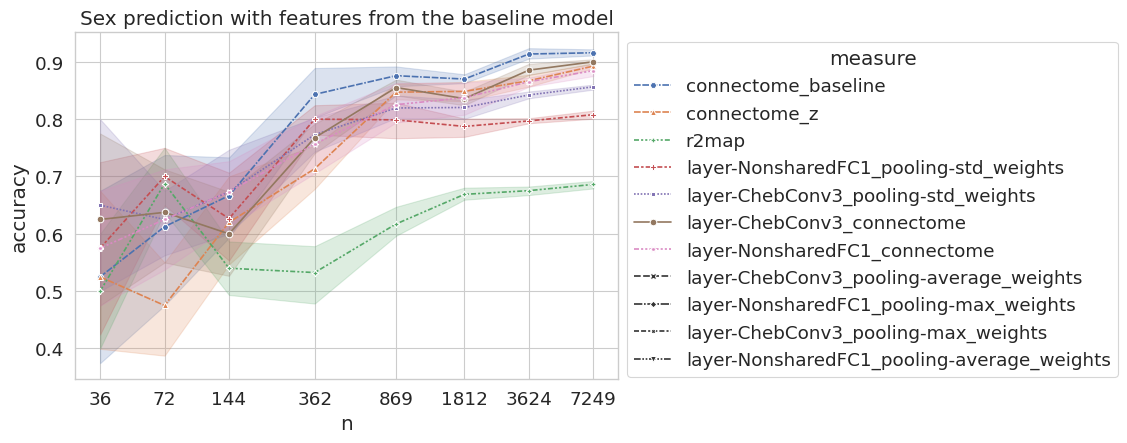

In [10]:
plt.figure(figsize=(7, 4.5))
ax = sns.lineplot(y='accuracy', x='n', hue='measure', style='measure', data=df_sex, hue_order=measures, markers=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Sex prediction with features from the baseline model')
plt.xscale('log')
plt.xticks(df_sex['n'].unique(), df_sex['n'].unique())

([<matplotlib.axis.XTick at 0x703e2b10a4b0>,
 [Text(36, 0, '36'),
  Text(869, 0, '869'),
  Text(144, 0, '144'),
  Text(1812, 0, '1812'),
  Text(3624, 0, '3624'),
  Text(7249, 0, '7249'),
  Text(362, 0, '362'),
  Text(72, 0, '72')])

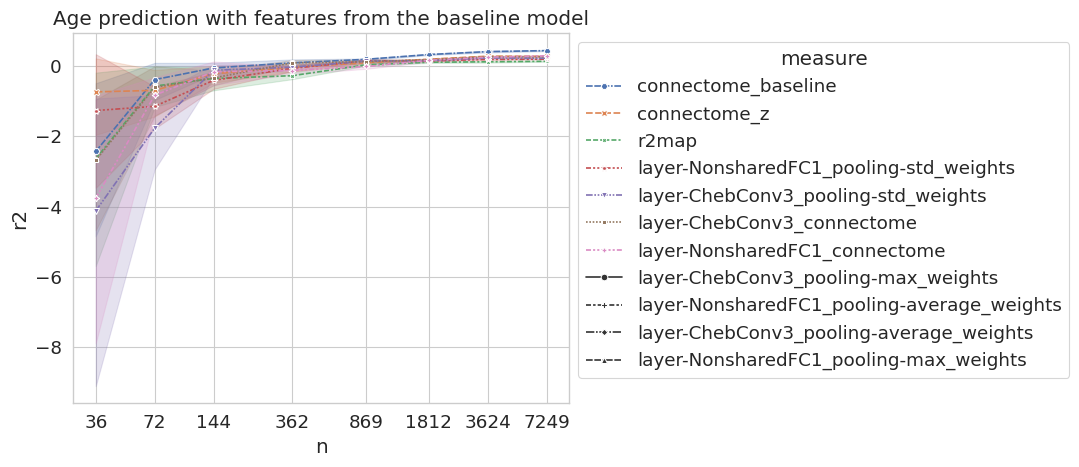

In [11]:
ax = sns.lineplot(y='r2', x='n', hue='measure', data=df_age, hue_order=measures, markers=True, style='measure')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Age prediction with features from the baseline model')
plt.xscale('log')
plt.xticks(df_age['n'].unique(), df_age['n'].unique())


([<matplotlib.axis.XTick at 0x703e2b0af500>,
 [Text(36, 0, '36'),
  Text(869, 0, '869'),
  Text(144, 0, '144'),
  Text(1812, 0, '1812'),
  Text(3624, 0, '3624'),
  Text(7249, 0, '7249'),
  Text(362, 0, '362'),
  Text(72, 0, '72')])

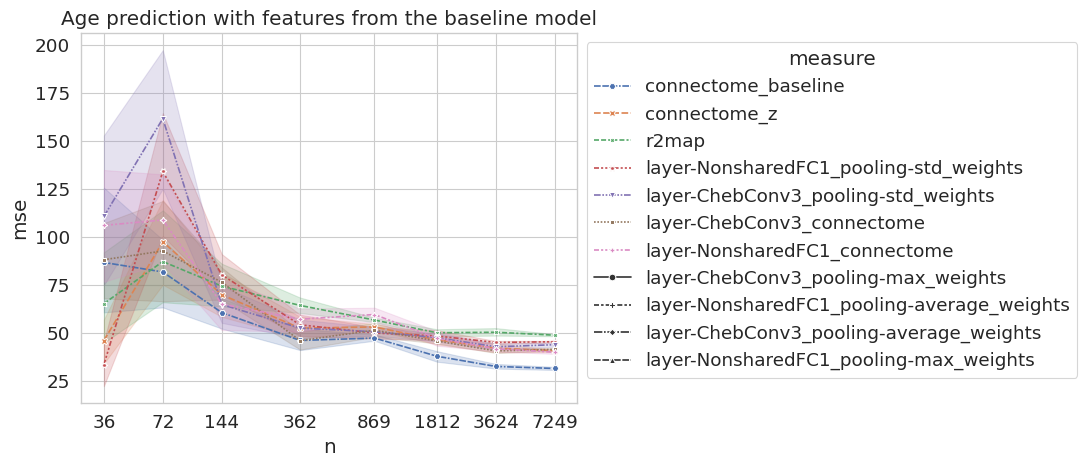

In [12]:
ax = sns.lineplot(y='mse', x='n', hue='measure', data=df_age, hue_order=measures, markers=True, style='measure')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Age prediction with features from the baseline model')
plt.xscale('log')
plt.xticks(df_age['n'].unique(), df_age['n'].unique())


([<matplotlib.axis.XTick at 0x703e2af854f0>,
 [Text(36, 0, '36'),
  Text(869, 0, '869'),
  Text(144, 0, '144'),
  Text(1812, 0, '1812'),
  Text(3624, 0, '3624'),
  Text(7249, 0, '7249'),
  Text(362, 0, '362'),
  Text(72, 0, '72')])

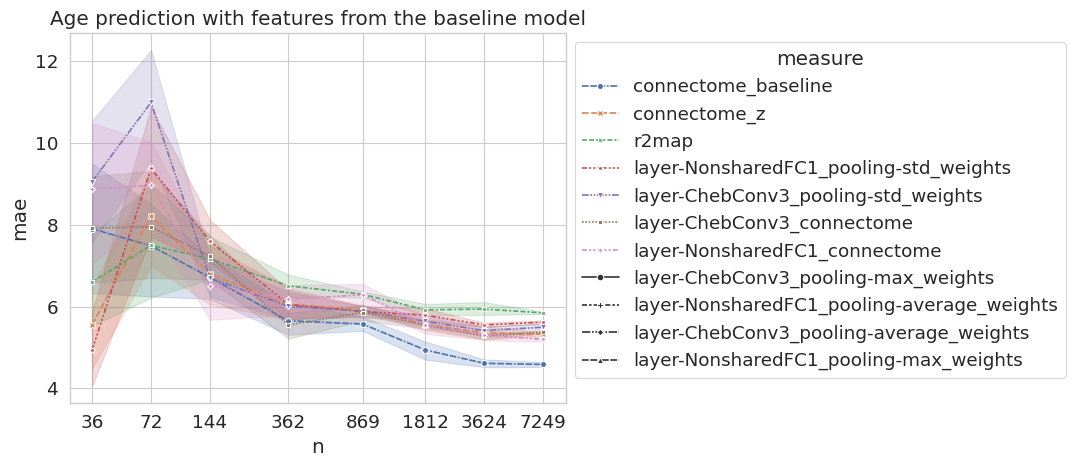

In [13]:
ax = sns.lineplot(y='mae', x='n', hue='measure', data=df_age, hue_order=measures, markers=True, style='measure')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Age prediction with features from the baseline model')
plt.xscale('log')
plt.xticks(df_age['n'].unique(), df_age['n'].unique())


Text(0.5, 1.0, 'Diagnosis classification with features from the baseline model')

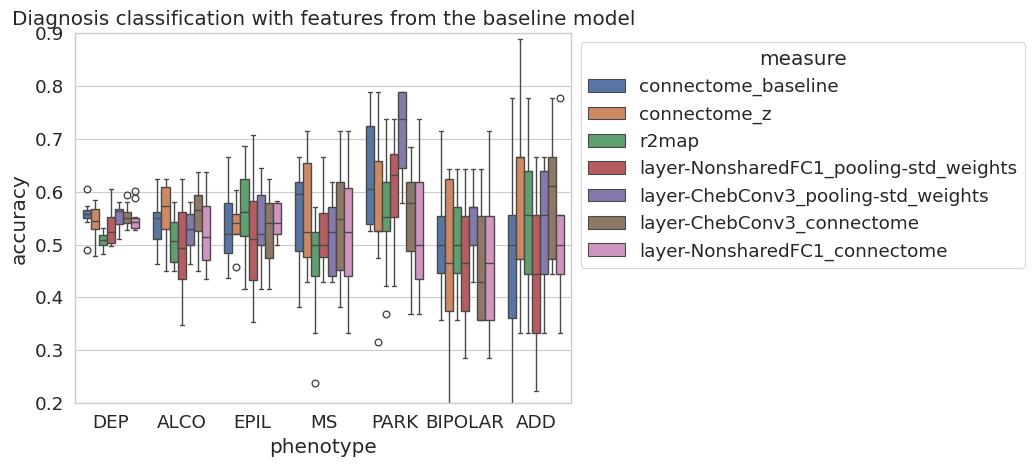

In [14]:
ax = sns.boxplot(
    x="phenotype",
    y="accuracy",
    hue="measure",
    data=df_diag,
    hue_order=measures,
    order=['DEP', 'ALCO', 'EPIL', 'MS', 'PARK', 'BIPOLAR', 'ADD']
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylim(0.2, 0.9)
plt.title('Diagnosis classification with features from the baseline model')